In [30]:
#Importing the requried files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Tarun/OneDrive/Desktop/pppp/Internship_Engineering_graduate_salary - Copy (1).csv")

In [4]:
data = df.copy()

In [27]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'experince', 'openess_to_experience', 'Salary'],
      dtype='object')

In [6]:
x = data.iloc[:, :-1].values

In [7]:
y = data.iloc[:, -1].values

In [8]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
mi = mutual_info_regression(x,y)
len(mi)

25

In [10]:
def make_mi_scores(x, y):
    mi_scores = mutual_info_regression(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores")
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(x, y)
mi = mi_scores.head(20)
mi

10    0.109283
7     0.087179
23    0.085723
2     0.077829
1     0.074546
8     0.059722
11    0.056147
20    0.051564
19    0.049370
22    0.046808
21    0.046266
9     0.038689
24    0.035609
12    0.032853
5     0.028273
14    0.022846
17    0.021264
3     0.016872
4     0.009420
13    0.005744
Name: MI Scores, dtype: float64

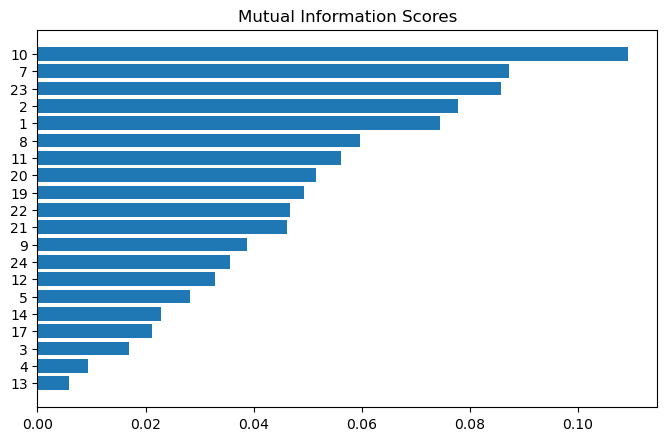

In [11]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi)

In [12]:
j = 0
for i in data.columns:
    print(j, " ==> ", i, '\n')
    j = j+1

0  ==>  Gender 

1  ==>  10percentage 

2  ==>  12percentage 

3  ==>  CollegeTier 

4  ==>  Degree 

5  ==>  collegeGPA 

6  ==>  CollegeCityTier 

7  ==>  GraduationYear 

8  ==>  English 

9  ==>  Logical 

10  ==>  Quant 

11  ==>  Domain 

12  ==>  ComputerProgramming 

13  ==>  ElectronicsAndSemicon 

14  ==>  ComputerScience 

15  ==>  MechanicalEngg 

16  ==>  ElectricalEngg 

17  ==>  TelecomEngg 

18  ==>  CivilEngg 

19  ==>  conscientiousness 

20  ==>  agreeableness 

21  ==>  extraversion 

22  ==>  nueroticism 

23  ==>  experince 

24  ==>  openess_to_experience 

25  ==>  Salary 



In [13]:
#

<AxesSubplot:>

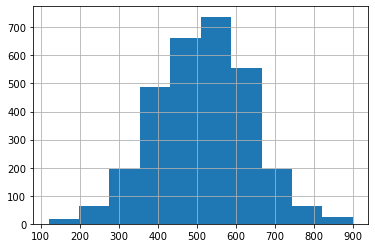

In [14]:
data.Quant.hist() 

<AxesSubplot:>

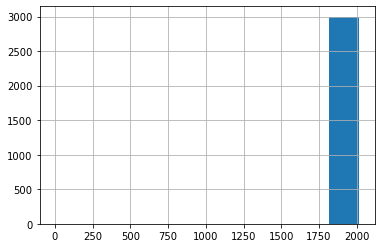

In [15]:
data.GraduationYear.hist() 

<AxesSubplot:>

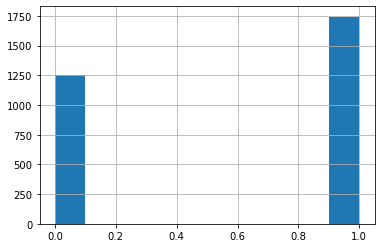

In [16]:
data.experince.hist() 

<AxesSubplot:>

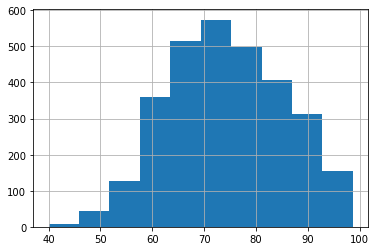

In [18]:
data['12percentage'].hist() 

<AxesSubplot:>

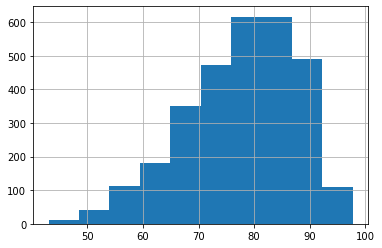

In [19]:
data['10percentage'].hist() 

In [ ]:
#Quant, GraduationYear,   experince, 12percentage, 10percentage 

<AxesSubplot:>

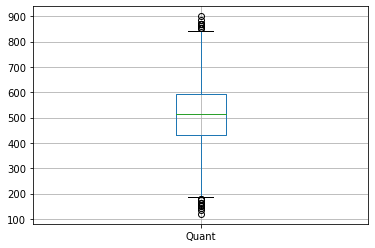

In [20]:
data.boxplot(column = ['Quant'])

<AxesSubplot:>

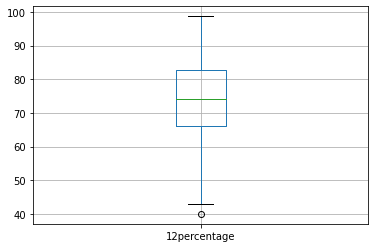

In [24]:
data.boxplot(column = ['12percentage'])

<AxesSubplot:>

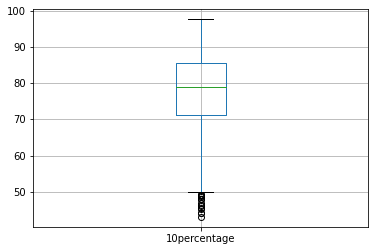

In [25]:
data.boxplot(column = ['10percentage'])

In [28]:
data[['Quant', 'GraduationYear',   'experince', '12percentage', '10percentage' ,  'Salary']].corr()

,Quant,GraduationYear,experince,12percentage,10percentage,Salary
Quant,1.000000,-0.024857,0.014726,0.316400,0.328888,0.239345
GraduationYear,-0.024857,1.000000,0.051474,-0.015845,-0.017208,-0.009333
experince,0.014726,0.051474,1.000000,0.040982,0.076095,-0.194198
12percentage,0.316400,-0.015845,0.040982,1.000000,0.645578,0.172755
10percentage,0.328888,-0.017208,0.076095,0.645578,1.000000,0.181414
Salary,0.239345,-0.009333,-0.194198,0.172755,0.181414,1.000000


<AxesSubplot:>

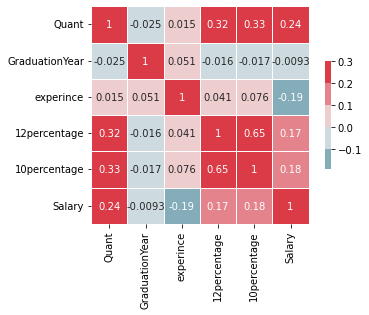

In [31]:
from seaborn import diverging_palette
cmap = sns.diverging_palette(220, 10)
sns.heatmap(data[['Quant', 'GraduationYear',   'experince', '12percentage', '10percentage' ,  'Salary']].corr(), vmax = .3, center = 0, cmap = cmap, square = True, linewidths =0.5, cbar_kws = {'shrink' : .5},annot = True)


<AxesSubplot:xlabel='Quant', ylabel='Salary'>

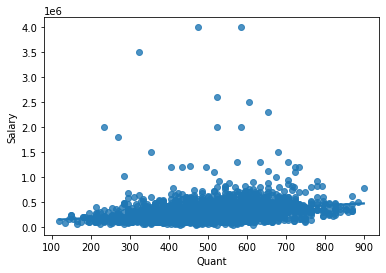

In [32]:
sns.regplot(x=data['Quant'], y=data['Salary'])

<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

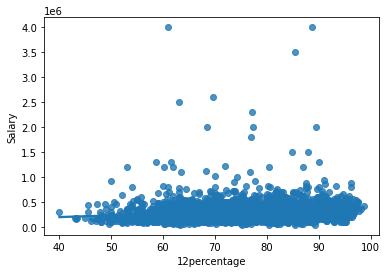

In [36]:
sns.regplot(x=data['12percentage'], y=data['Salary'])

<AxesSubplot:xlabel='10percentage', ylabel='Salary'>

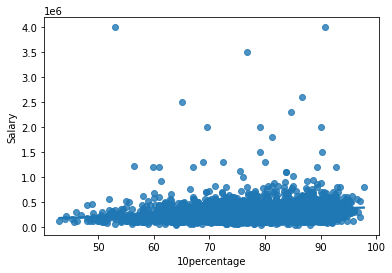

In [38]:
sns.regplot(x=data['10percentage'], y=data['Salary'])

<AxesSubplot:xlabel='Quant', ylabel='Salary'>

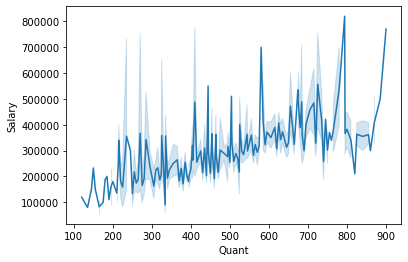

In [39]:
sns.lineplot(x=data['Quant'], y=data['Salary'])

<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

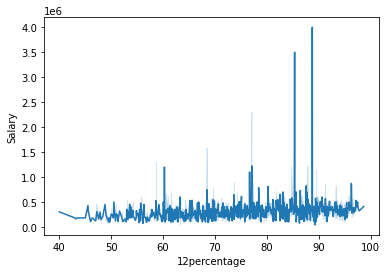

In [40]:
sns.lineplot(x=data['12percentage'], y=data['Salary'])

<AxesSubplot:xlabel='10percentage', ylabel='Salary'>

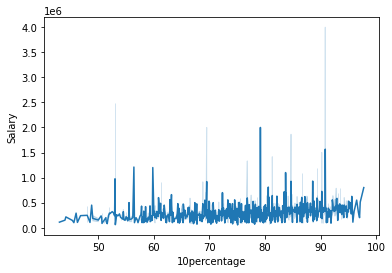

In [42]:
sns.lineplot(x=data['10percentage'], y=data['Salary'])